In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
# necessary for the plot to appear in a Jupyter
%matplotlib inline
# Control the default size of figures in this Jupyter 
%pylab inline


from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

Populating the interactive namespace from numpy and matplotlib


In [2]:
comp = "AAPL"

In [3]:

#PR = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/TOP500PR.csv")
#HR = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/TOP500HR.csv")

#PR = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/TOP17NewsAgHR.csv")
#HR = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/TOP17NewsAgHR.csv")

PR = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/ET/"+comp+"/PR.csv")
HR = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/ET/"+comp+"/HR.csv")


RT = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/ET/"+comp+"/RAW.csv")
FT = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/ET/"+comp+"/FIN.csv")

In [4]:
# This is data set of previously financially filtered data.Empty 
# tone suggests that at that time no financial info was available about such so the value is 0
PR[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]] = PR[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]].fillna(0)
HR[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]] = HR[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]].fillna(0)
RT[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]] = RT[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]].fillna(0)
FT[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]] = FT[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]].fillna(0)

In [5]:
len(PR)

9310

In [6]:
PR.head()

,date,tone,positive,negative,polarity,activ_den,self_den,fin_return,weight
0,2016-02-29 00:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
1,2016-02-29 00:45:00,-5.292479,0.278552,5.571031,5.849582,23.955432,1.114206,NaN,7.072573e-07
2,2016-02-29 01:00:00,-2.005348,1.069519,3.074866,4.144385,29.144385,0.000000,NaN,6.790855e-04
3,2016-02-29 01:15:00,-3.174603,0.577201,3.751804,4.329004,24.963925,1.875902,NaN,8.718977e-06
4,2016-02-29 01:30:00,-3.736655,1.245552,4.982206,6.227758,36.298932,0.000000,NaN,1.421584e-06


/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


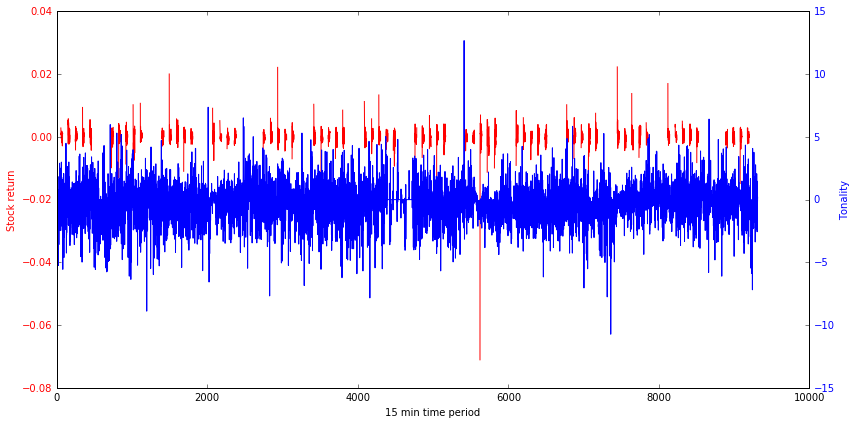

In [7]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# Create some mock data
t = np.arange(1, len(FT.tone)+1, 1)
tone = FT.tone
s_return = FT.fin_return

fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('15 min time period')
ax1.set_ylabel('Stock return', color=color)
ax1.plot(t, s_return, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Tonality', color=color)  # we already handled the x-label with ax1
ax2.plot(t, tone, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
print(adfuller(HR.tone))
# diff_tn = HR.tone.diff(1)
# HR.tone = diff_tn
# HR = HR[1:]
# HR.reset_index(drop=True)
# adfuller(HR.tone)

(-14.885998278764376, 1.5832152480933059e-27, 20, 9289, {'10%': -2.5669356477985454, '5%': -2.8618512020962417, '1%': -3.4310541778452177}, 32171.998273526446)


In [10]:
print(adfuller(PR.tone))
# diff_tn = PR.tone.diff(1)
# PR.tone = diff_tn
# PR = PR[1:]
# PR.reset_index(drop=True)
# adfuller(PR.tone)

(-16.00687261800538, 6.419664564386475e-29, 20, 9289, {'10%': -2.5669356477985454, '5%': -2.8618512020962417, '1%': -3.4310541778452177}, 35709.2129864421)


In [11]:
#print(adfuller(RT.tone))
# diff_tn = RT.tone.diff(1)
# RT.tone = diff_tn
# RT = RT[1:]
# RT.reset_index(drop=True)
# adfuller(RT.tone)

In [12]:
#print(adfuller(FT.tone))
# diff_tn = FT.tone.diff(1)
# FT.tone = diff_tn
# FT = FT[1:]
# FT.reset_index(drop=True)
# adfuller(FT.tone)

In [13]:
# PR.to_csv("PR.csv",  index=False)
# HR.to_csv("HR.csv",  index=False)
# RT.to_csv("RAW.csv",  index=False)
# FT.to_csv("FIN.csv",  index=False)

#PR.loc[abs(PR['weight']) < 0.001, 'tone'] = 0
#HR.loc[abs(HR['weight']) > 0.0005, 'tone'] = 0

In [14]:
PR.head()

,date,tone,positive,negative,polarity,activ_den,self_den,fin_return,weight
0,2016-02-29 00:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
1,2016-02-29 00:45:00,-5.292479,0.278552,5.571031,5.849582,23.955432,1.114206,NaN,7.072573e-07
2,2016-02-29 01:00:00,-2.005348,1.069519,3.074866,4.144385,29.144385,0.000000,NaN,6.790855e-04
3,2016-02-29 01:15:00,-3.174603,0.577201,3.751804,4.329004,24.963925,1.875902,NaN,8.718977e-06
4,2016-02-29 01:30:00,-3.736655,1.245552,4.982206,6.227758,36.298932,0.000000,NaN,1.421584e-06


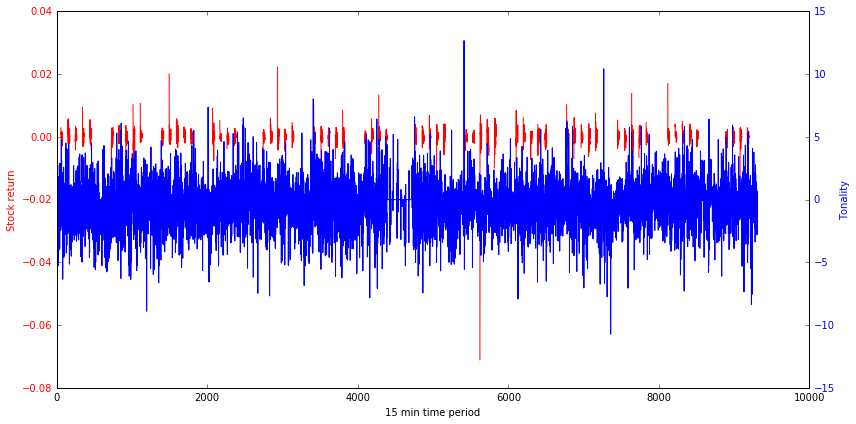

In [15]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# Create some mock data
t = np.arange(1, len(PR.tone)+1, 1)
tone = PR.tone
s_return = PR.fin_return

fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('15 min time period')
ax1.set_ylabel('Stock return', color=color)
ax1.plot(t, s_return, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Tonality', color=color)  # we already handled the x-label with ax1
ax2.plot(t, tone, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


## Stock return & Tone  Pearson correlation

In [16]:

print("Raw:  " + str(RT[['tone', 'fin_return']].corr().values[0][1]))
print("Financial:  " + str(FT[['tone', 'fin_return']].corr().values[0][1]))
print("Financial & Harmonics:  " + str(HR[['tone', 'fin_return']].corr().values[0][1]))
print("Financial & Page Rank:  " + str(PR[['tone', 'fin_return']].corr().values[0][1]))

Raw:  -0.04826839173338535
Financial:  0.027985317889454596
Financial & Harmonics:  0.031246216749011416
Financial & Page Rank:  0.02498444551641992


## Previous Time Stamp observation

In [17]:
from pandas.plotting import lag_plot
def plot_logs(datafr= None):

    matplotlib.rcParams['figure.figsize'] = (12.0, 4.0)
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols=2, nrows=3,figsize=(15, 15)) 

    lag_plot(datafr.tone, ax=ax1)
    lag_plot(datafr.polarity, ax=ax2)
    lag_plot(datafr.positive, ax=ax3)
    lag_plot(datafr.negative, ax=ax4)
    lag_plot(datafr.activ_den, ax=ax5)
    lag_plot(datafr.self_den, ax=ax6)

    ax1.set_title("Tone")
    ax2.set_title("Polarity")
    ax3.set_title("Positive")
    ax4.set_title("Negative")
    ax5.set_title("Active dencity")
    ax6.set_title("Self-dencity")

    fig.tight_layout()

###  RAW

In [18]:
#plot_logs(RT)

### Financial

In [19]:
#plot_logs(FT)

### Financial & Page Rank

In [20]:
#plot_logs(PR)

### Financial & Harmonics

In [21]:
#plot_logs(HR)

## Tone Autocorrelation

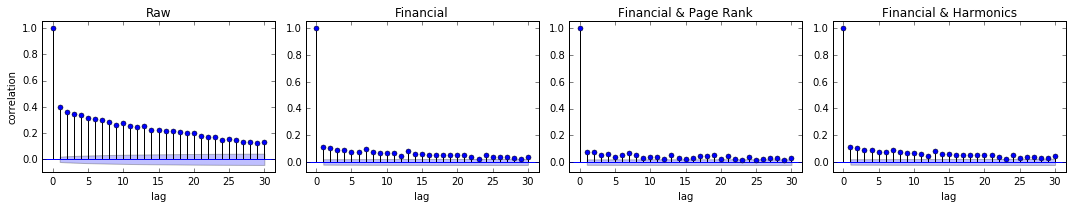

In [22]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(ncols=4, nrows=1,figsize=(15, 3)) 

plot_acf(RT.tone,  lags=30, ax=ax1)
plot_acf(FT.tone,  lags=30, ax=ax2)
plot_acf(PR.tone,  lags=30, ax=ax3)
plot_acf(HR.tone,  lags=30, ax=ax4)


ax1.set_title("Raw")
ax2.set_title("Financial")
ax3.set_title("Financial & Page Rank")
ax4.set_title("Financial & Harmonics")

ax1.set_xlabel('lag')
ax1.set_ylabel('correlation')
ax2.set_xlabel('lag')
ax3.set_xlabel('lag')
ax4.set_xlabel('lag')


fig.tight_layout()

## TONE & Stock Return cross-correlation

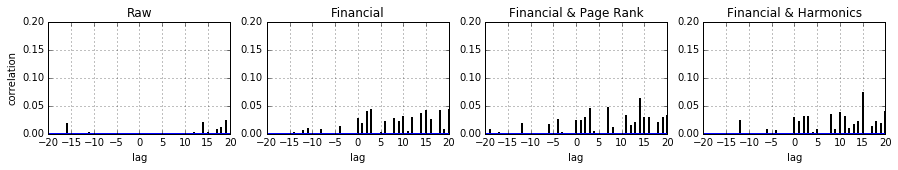

In [23]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(ncols=4, nrows=1,figsize=(15, 2))

ax1.xcorr(RT[RT.fin_return.notnull()].tone, RT[RT.fin_return.notnull()].fin_return, usevlines=True, maxlags=20, normed=True, lw=2)
ax1.axhline(y = 0.2, color='blue',  linestyle='dashed', lw=2)
ax1.grid(True)
ax1.set_ylim([0, 0.2])
ax1.set_title("Raw")
ax1.set_xlabel('lag')
ax1.set_ylabel('correlation')

ax2.xcorr(FT[FT.fin_return.notnull()].tone, FT[FT.fin_return.notnull()].fin_return, usevlines=True, maxlags=20, normed=True, lw=2)
ax2.axhline(y = 0.2, color='blue',  linestyle='dashed', lw=2)
ax2.grid(True)
ax2.set_ylim([0, 0.2])
ax2.set_title("Financial")
ax2.set_xlabel('lag')

ax3.xcorr(PR[PR.fin_return.notnull()].tone, PR[PR.fin_return.notnull()].fin_return, usevlines=True, maxlags=20, normed=True, lw=2)
ax3.axhline(y = 0.2, color='blue',  linestyle='dashed', lw=2)
ax3.grid(True)
ax3.set_ylim([0, 0.2])
ax3.set_title("Financial & Page Rank")
ax3.set_xlabel('lag')

ax4.xcorr(HR[HR.fin_return.notnull()].tone, HR[HR.fin_return.notnull()].fin_return, usevlines=True, normed=True, maxlags=20, lw=2)
ax4.grid(True)
ax4.axhline(0.2, color='blue', linestyle='dashed', lw=2)
ax4.set_ylim([0, 0.2])
ax4.set_title("Financial & Harmonics")
ax4.set_xlabel('lag')


In [24]:
fil_PR = PR[PR.fin_return.notnull()][:100]

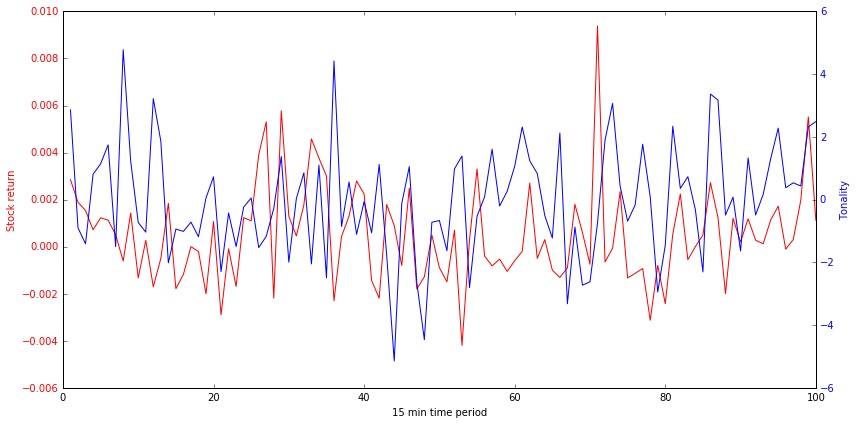

In [25]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# Create some mock data
t = np.arange(1, len(fil_PR.tone)+1, 1)
tone = fil_PR.tone
s_return = fil_PR.fin_return

fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('15 min time period')
ax1.set_ylabel('Stock return', color=color)
ax1.plot(t, fil_PR.fin_return, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Tonality', color=color)  # we already handled the x-label with ax1
ax2.plot(t, tone, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [26]:
len(RT)

9311

#### Changing  data

In [27]:
fin_PR = FT[FT.fin_return.notna()].reset_index(drop = True)

In [28]:
len(fin_PR)

1700

In [29]:
sample = fin_PR[['tone', 'polarity', 'fin_return', 'positive','negative', 'activ_den', 'self_den']]
sample.head()

,tone,polarity,fin_return,positive,negative,activ_den,self_den
0,2.510779,3.776119,0.002844,3.143449,0.632670,18.381426,0.278607
1,-0.902935,2.257336,0.001885,0.677201,1.580135,20.993228,0.902935
2,0.188151,3.843036,0.001537,2.015593,1.827442,23.076975,0.630599
3,0.983900,5.234250,0.000716,3.109075,2.125175,24.316033,1.912048
4,1.159721,6.772820,0.001228,3.966270,2.806549,24.543870,1.137753


In [30]:
sample['shift_1_return'] = sample['fin_return'].shift(1)
sample = sample[1:].reset_index(drop=True)

In [31]:
sample.head()

,tone,polarity,fin_return,positive,negative,activ_den,self_den,shift_1_return
0,-0.902935,2.257336,0.001885,0.677201,1.580135,20.993228,0.902935,0.002844
1,0.188151,3.843036,0.001537,2.015593,1.827442,23.076975,0.630599,0.001885
2,0.983900,5.234250,0.000716,3.109075,2.125175,24.316033,1.912048,0.001537
3,1.159721,6.772820,0.001228,3.966270,2.806549,24.543870,1.137753,0.000716
4,1.744972,3.322348,0.001123,2.533660,0.788688,21.312884,0.804180,0.001228


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sample[['tone', 'polarity', 'shift_1_return', 'positive', 'negative']], sample.fin_return.values, test_size=0.10, shuffle = False)

In [33]:
from sklearn.metrics import r2_score
reg = LinearRegression().fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)
print(reg.score(X_train, y_train))

[-2.22143923e+10 -6.33412543e+09 -8.43749009e-03  2.85485178e+10
 -1.58802669e+10]
-0.00011385184692572751
0.0012278092989018718


In [34]:
len(y_train)

1529

In [35]:
res = reg.predict(X_test)

In [36]:
#plt.plot(res, label="predicted")

In [37]:
#plt.plot(y_test, color="red")

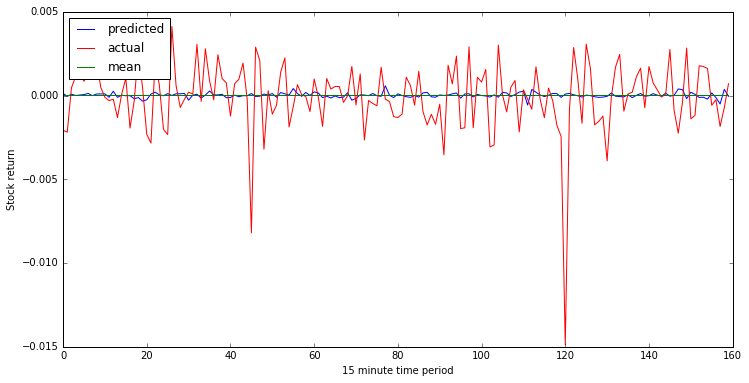

In [38]:
plt.plot(res.reshape(-1, 1)[:160], label="predicted")
plt.plot(y_test.tolist()[:160], label= "actual", color="red")
plt.plot([np.mean(y_train) for i in range(len(y_test.tolist()))][:160], label= "mean", color="green")
plt.xlabel("15 minute time period")
plt.ylabel("Stock return")
pylab.legend(loc='upper left')

In [39]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(res.reshape(-1, 1), y_test.tolist())
mse2 = mean_squared_error([np.mean(y_train) for i in range(len(y_test.tolist()))], y_test.tolist())

In [40]:
#mse1 = mean_squared_error(y_train.tolist(), res.reshape(-1, 1) )
#mse2 = mean_squared_error(y_train.tolist(), [np.mean(y_train) for i in range(len(y_train.tolist()))])

In [41]:
mse2 *1000

0.0040365572997041925

In [42]:
mse1 *1000

0.004087301022921503

In [43]:
#X_train

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X_new = SelectKBest(f_regression, k=3).fit_transform(X_train, y_train)

In [45]:
X_new

array([[-0.90293454,  0.6772009 ,  1.58013544],
       [ 0.1881509 ,  2.01559339,  1.82744249],
       [ 0.98389982,  3.10907472,  2.1251749 ],
       ...,
       [-0.59468251,  2.74840426,  3.34308677],
       [ 0.61375104,  3.11167031,  2.49791927],
       [ 2.11474068,  3.71785867,  1.60311799]])

In [46]:
f_regression(X_train, y_train)

(array([1.56852719e+00, 1.42061080e-03, 7.86436546e-02, 5.70346238e-01,
        4.74835075e-01]),
 array([0.21061281, 0.96993899, 0.77918196, 0.45023783, 0.49087586]))

In [47]:
float(6.93016740e-05*100)

0.006930167399999999

In [48]:
# #### matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# # Create some mock data
# t = np.arange(1, len(y_test.tolist())+1, 1)
# act = y_test.tolist()
# pred = res.reshape(-1).tolist()

# fig, ax1 = plt.subplots()

# color = 'red'
# ax1.set_xlabel('15 min time period')
# ax1.set_ylabel('actual', color=color)
# ax1.plot(t, act, color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'blue'
# ax2.set_ylabel('predicted', color=color)  # we already handled the x-label with ax1
# ax2.plot(t, pred, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()

In [49]:
# plot(range(len(act)), act)
# plot(range(len(pred)), pred, label="actual")
# plt.xlabel("15 minute time perios")
# plt.ylabel("stock return")
# pyplot.legend(["actual", "predicted"])

## Quantile Regression

In [50]:
def quant_reg_plot(dataFR, feature):
    
    mod = smf.quantreg( 'fin_return ~ '+ feature, dataFR)

    quantiles = np.arange(0.1, 1, 0.05)

    models = []
    params = []

    for qt in quantiles:
        res = mod.fit(q = qt)
        models.append(res)
        params.append([qt, res.params['Intercept'], res.params[feature]] + res.conf_int().loc[feature].tolist())
    params = pd.DataFrame(data=params, columns=['qt', 'inter', 'x_coef', 'lower_percentile', 'upper_percentile'])
    
    return params

In [51]:
PR = PR[PR.fin_return.notna()].reset_index(drop = True)
HR = HR[HR.fin_return.notna()].reset_index(drop = True)
FT = FT[FT.fin_return.notna()].reset_index(drop = True)
RT = RT[RT.fin_return.notna()].reset_index(drop = True)

In [52]:
lag_PR = PR[['tone', 'polarity', 'fin_return', 'positive','negative', 'activ_den', 'self_den']]
lag_HR = HR[['tone', 'polarity', 'fin_return', 'positive','negative', 'activ_den', 'self_den']]
lag_FT = FT[['tone', 'polarity', 'fin_return', 'positive','negative', 'activ_den', 'self_den']]
lag_RT = RT[['tone', 'polarity', 'fin_return', 'positive','negative', 'activ_den', 'self_den']]


lag_PR['shift_1_return'] = lag_PR['fin_return'].shift(1)
lag_PR = lag_PR[1:].reset_index(drop=True)

lag_HR['shift_1_return'] = lag_HR['fin_return'].shift(1)
lag_HR = lag_HR[1:].reset_index(drop=True)

lag_FT['shift_1_return'] = lag_FT['fin_return'].shift(1)
lag_FT = lag_FT[1:].reset_index(drop=True)

lag_RT['shift_1_return'] = lag_RT['fin_return'].shift(1)
lag_RT= lag_RT[1:].reset_index(drop=True)

/home/ostapkharysh/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/ostapkharysh/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


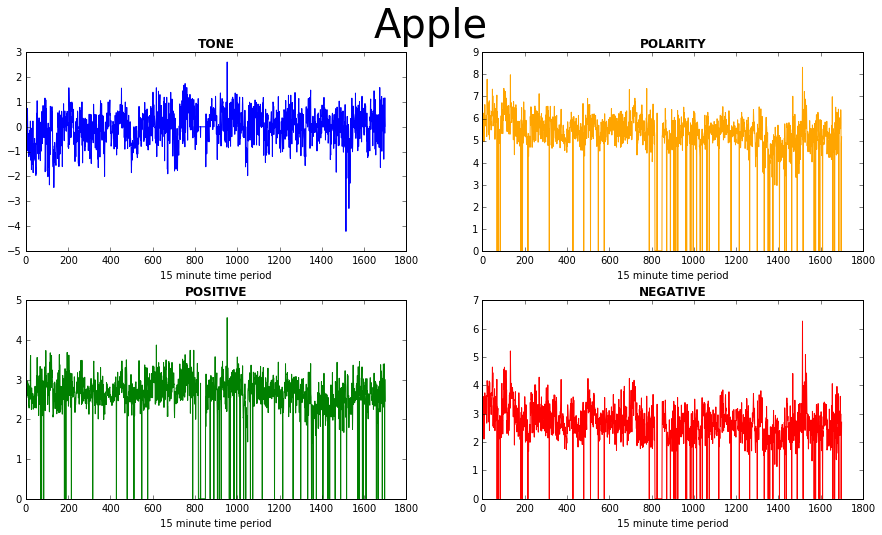

In [53]:
fig, ((ax2, ax3), (ax4, ax5)) = plt.subplots(ncols=2, nrows=2,figsize=(15, 8))
ax2.plot(range(len(RT)),RT.tone)
ax3.plot(range(len(RT)),RT.polarity, color="orange")
ax4.plot(range(len(RT)),RT.positive, color="green")
ax5.plot(range(len(RT)),RT.negative, color="red")

ax2.set_title("TONE",fontweight="bold")
ax3.set_title("POLARITY",fontweight="bold")
ax4.set_title("POSITIVE",fontweight="bold")
ax5.set_title("NEGATIVE",fontweight="bold")

ax2.set_xlabel("15 minute time period")
ax3.set_xlabel("15 minute time period")
ax4.set_xlabel("15 minute time period")
ax5.set_xlabel("15 minute time period")

fig.subplots_adjust(hspace=0.25)
fig.suptitle('Apple', fontsize=40)

In [54]:
RT.fin_return.values

array([ 2.84449176e-03,  1.88486056e-03,  1.53733402e-03, ...,
        7.12725178e-04,  3.21021137e-05, -3.10665456e-05])

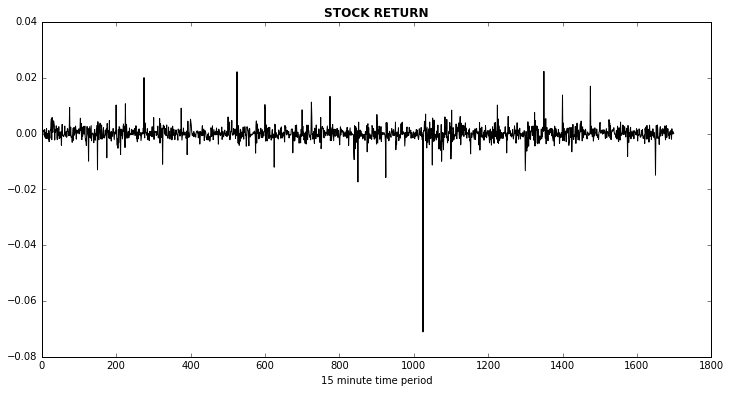

In [55]:
plt.xlabel("15 minute time period")
plot(range(len(RT.fin_return.values)), RT.fin_return.values, color="black")
plt.title("STOCK RETURN", fontweight="bold")

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


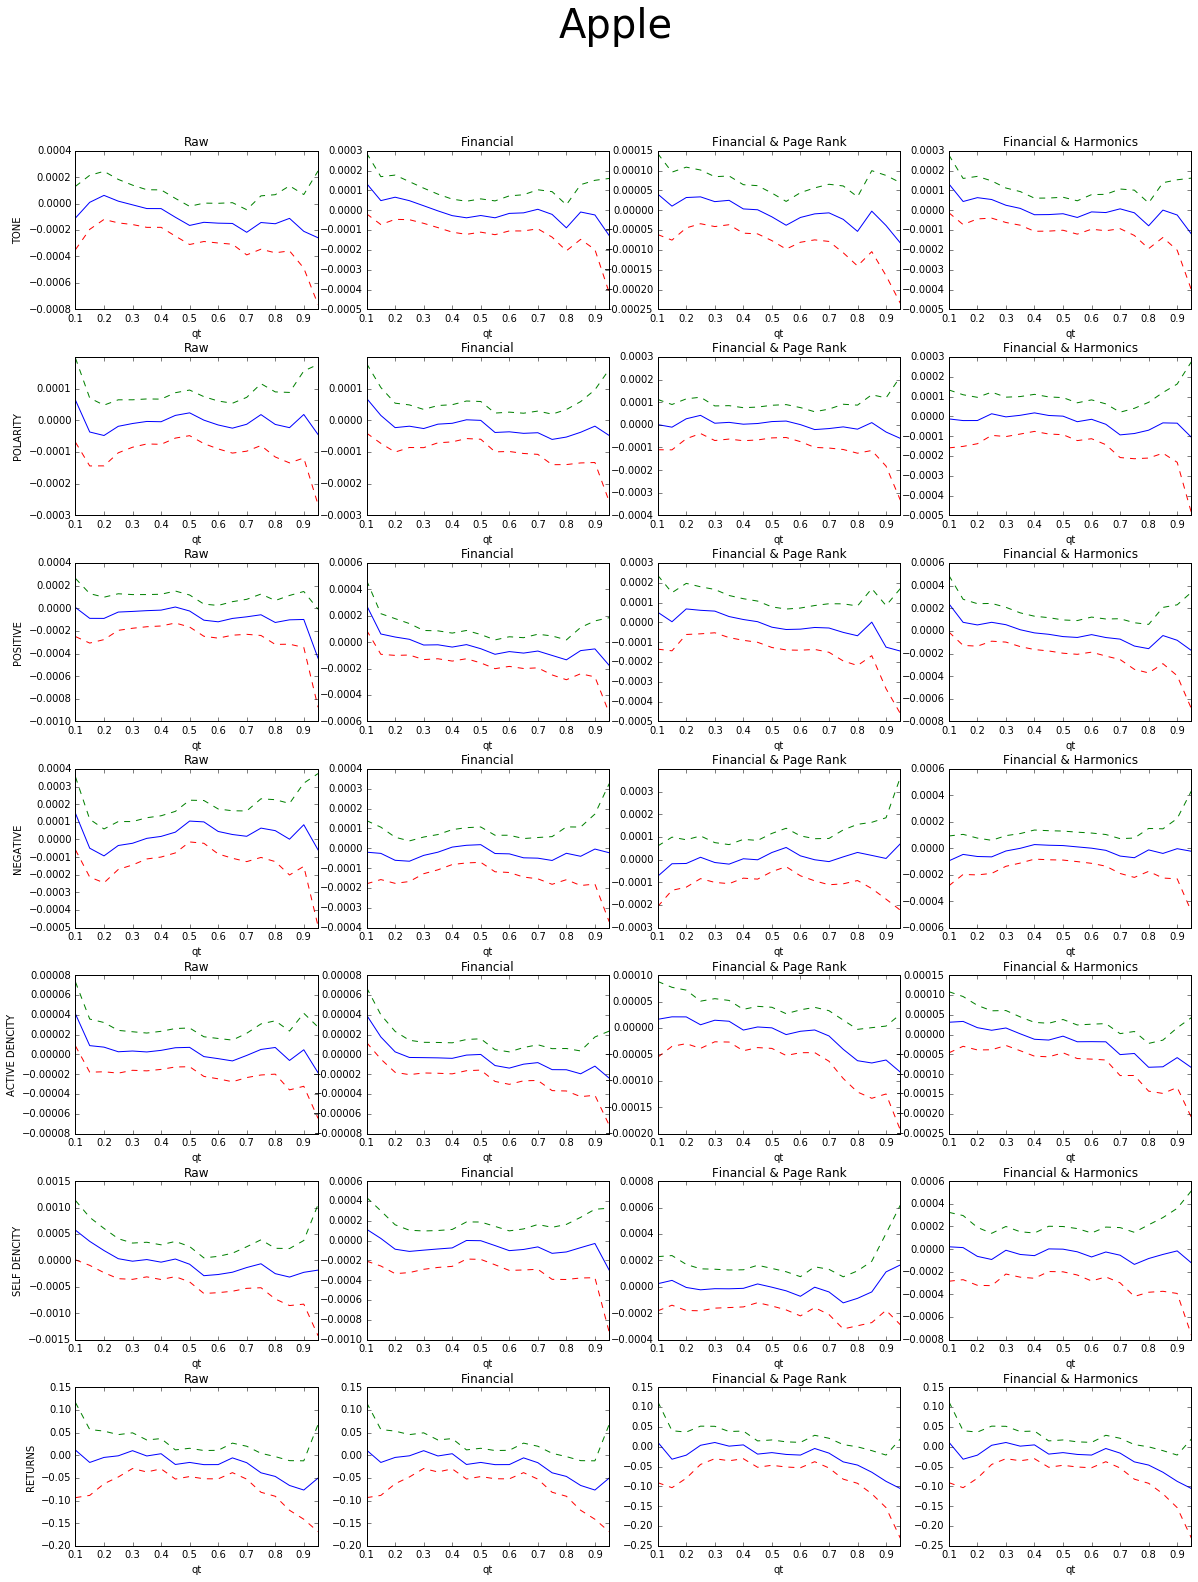

In [56]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), 
      (ax13, ax14, ax15, ax16), (ax17, ax18, ax19, ax20), (ax21, ax22, ax23, ax24), 
      (ax25, ax26, ax27, ax28)) = plt.subplots(ncols=4, nrows=7,figsize=(20, 25))
# for big image wirth 8 features: figsize=(20, 25) #8

quant_reg_plot(RT, 'tone').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax1, legend=False)
quant_reg_plot(FT, 'tone').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax2, legend=False)
quant_reg_plot(PR, 'tone').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax3, legend=False)
quant_reg_plot(HR, 'tone').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax4, legend=False)

ax1.set_ylabel("TONE")
ax1.set_title("Raw")
ax2.set_title("Financial")
ax3.set_title("Financial & Page Rank")
ax4.set_title("Financial & Harmonics")



quant_reg_plot(RT, 'polarity').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax5, legend=False)
quant_reg_plot(FT, 'polarity').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax6, legend=False)
quant_reg_plot(PR, 'polarity').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax7, legend=False)
quant_reg_plot(HR, 'polarity').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax8, legend=False)

ax5.set_ylabel("POLARITY")
ax5.set_title("Raw")
ax6.set_title("Financial")
ax7.set_title("Financial & Page Rank")
ax8.set_title("Financial & Harmonics")



quant_reg_plot(RT, 'positive').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax9, legend=False)
quant_reg_plot(FT, 'positive').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax10, legend=False)
quant_reg_plot(PR, 'positive').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax11, legend=False)
quant_reg_plot(HR, 'positive').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax12, legend=False)

ax9.set_ylabel("POSITIVE")
ax9.set_title("Raw")
ax10.set_title("Financial")
ax11.set_title("Financial & Page Rank")
ax12.set_title("Financial & Harmonics")



quant_reg_plot(RT, 'negative').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax13, legend=False)
quant_reg_plot(FT, 'negative').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax14, legend=False)
quant_reg_plot(PR, 'negative').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax15, legend=False)
quant_reg_plot(HR, 'negative').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax16, legend=False)

ax13.set_ylabel("NEGATIVE")
ax13.set_title("Raw")
ax14.set_title("Financial")
ax15.set_title("Financial & Page Rank")
ax16.set_title("Financial & Harmonics")



quant_reg_plot(RT, 'activ_den').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax17, legend=False)
quant_reg_plot(FT, 'activ_den').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax18, legend=False)
quant_reg_plot(PR, 'activ_den').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax19, legend=False)
quant_reg_plot(HR, 'activ_den').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax20, legend=False)

ax17.set_ylabel("ACTIVE DENCITY")
ax17.set_title("Raw")
ax18.set_title("Financial")
ax19.set_title("Financial & Page Rank")
ax20.set_title("Financial & Harmonics")


quant_reg_plot(RT, 'self_den').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax21, legend=False)
quant_reg_plot(FT, 'self_den').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax22, legend=False)
quant_reg_plot(PR, 'self_den').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax23, legend=False)
quant_reg_plot(HR, 'self_den').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax24, legend=False)

ax21.set_ylabel("SELF DENCITY")
ax21.set_title("Raw")
ax22.set_title("Financial")
ax23.set_title("Financial & Page Rank")
ax24.set_title("Financial & Harmonics")


quant_reg_plot(lag_RT, 'shift_1_return').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax25, legend=False)
quant_reg_plot(lag_FT, 'shift_1_return').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax26, legend=False)
quant_reg_plot(lag_PR, 'shift_1_return').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax27, legend=False)
quant_reg_plot(lag_HR, 'shift_1_return').plot(x = 'qt', y=['x_coef', 'lower_percentile', 'upper_percentile'], kind='line', style=['b-', 'r--', 'g--'], ax=ax28, legend=False)

ax25.set_ylabel("RETURNS")
ax25.set_title("Raw")
ax26.set_title("Financial")
ax27.set_title("Financial & Page Rank")
ax28.set_title("Financial & Harmonics")



fig.subplots_adjust(hspace=0.3)
fig.suptitle('Apple', fontsize=40)

 ## Autoregression

In [57]:
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [58]:
#prediction for the next 4 ours of 16 lags
fin_ret = RT.fin_return.values.tolist()
train, test = fin_ret[1:len(fin_ret)-27], fin_ret[len(fin_ret)-27:]

In [59]:
model = AR(train)
model_fit = model.fit(maxlags=4)
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 24
Coefficients: [ 6.30400006e-06 -6.31353916e-03  7.87868890e-03  2.44928578e-02
 -7.90967742e-03 -2.44517396e-02 -3.46574062e-02 -2.79710629e-03
  2.23750434e-02  2.41909656e-03  1.92166364e-02 -1.59247918e-02
  3.26874688e-02  1.40762348e-02  9.77649930e-03  9.74175425e-05
 -3.78057398e-02  5.29203705e-05 -1.81765964e-02  3.25909100e-02
  1.14571638e-02 -6.64548690e-03 -1.67006522e-02  9.81813451e-04
 -6.16572348e-03]


predicted=-0.000109, expected=-0.000082
predicted=0.000082, expected=0.000102
predicted=0.000299, expected=0.002760
predicted=0.000113, expected=-0.000868
predicted=-0.000123, expected=-0.002238
predicted=0.000000, expected=-0.000404
predicted=-0.000182, expected=0.002846
predicted=0.000098, expected=-0.001380
predicted=0.000049, expected=-0.001177
predicted=0.000242, expected=0.001790
predicted=0.000003, expected=0.001745
predicted=-0.000035, expected=0.001622
predicted=0.000009, expected=-0.000573
predicted=-0.000048, expected=-0.000243
predicted=0.000031, expected=-0.001836
predicted=-0.000044, expected=-0.000716
predicted=0.000013, expected=0.000717
predicted=0.000031, expected=-0.000169
predicted=0.000004, expected=0.001054
predicted=-0.000039, expected=-0.000377
predicted=-0.000003, expected=-0.002053
predicted=0.000009, expected=0.001721
predicted=0.000023, expected=-0.000177
predicted=-0.000007, expected=0.000307
predicted=0.000004, expected=0.000713
predicted=-0.000012, expect

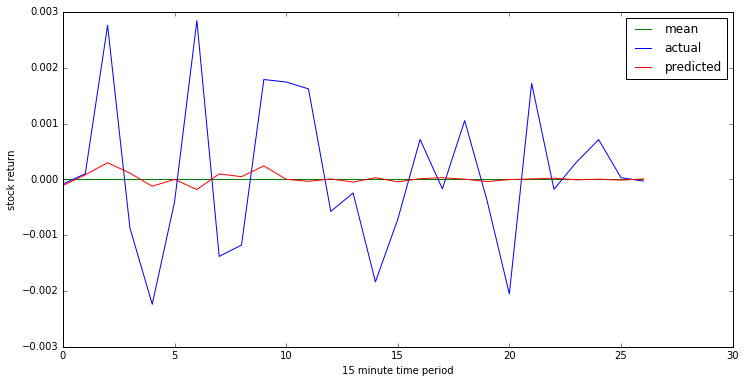

In [60]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.10f' % error)
# plot results
plt.xlabel("15 minute time period")
plt.ylabel("stock return")
pyplot.plot([np.mean(train) for i in range(len(test))], color='green')
pyplot.plot(test, color='blue')
pyplot.plot(predictions, color='red')
pyplot.legend(["mean", "actual", "predicted"])
pyplot.show()

In [61]:
mean_squared_error([np.mean(train) for i in range(len(test))], test)

1.7657069013073707e-06

In [62]:
mean_squared_error(predictions, test)

1.723455925375739e-06

## VAR process

In [63]:
from statsmodels.tsa.api import VAR, DynamicVAR

In [64]:
PR.head()

,date,tone,positive,negative,polarity,activ_den,self_den,fin_return,weight
0,2016-02-29 13:45:00,2.858929,3.655562,0.796633,4.452195,18.036166,0.230935,0.002844,0.000001
1,2016-02-29 14:00:00,-0.902935,0.677201,1.580135,2.257336,20.993228,0.902935,0.001885,0.000007
2,2016-02-29 14:15:00,-1.408935,0.192077,1.601012,1.793089,17.740723,1.459016,0.001537,0.003492
3,2016-02-29 14:30:00,0.806468,3.121325,2.314857,5.436181,24.023324,2.031036,0.000716,0.000003
4,2016-02-29 14:45:00,1.139860,4.067023,2.927163,6.994187,24.455679,1.219409,0.001228,0.000152


In [65]:
model = VAR(PR[['tone','polarity','fin_return']])

In [66]:
results = model.fit(2)

In [67]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 15, May, 2019
Time:                     21:03:36
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -9.86421
Nobs:                     1577.00    HQIC:                  -9.90909
Log likelihood:           1142.25    FPE:                4.84184e-05
AIC:                     -9.93563    Det(Omega_mle):     4.77794e-05
--------------------------------------------------------------------
Results for equation tone
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.442422         0.210105           -2.106           0.035
L1.tone               0.075488         0.025706            2.937           0.003
L1.polarity           0.073197         0.030647            2.

In [68]:
results.pvalues_dt

array([[3.52293439e-002, 8.92537450e-124, 6.48884148e-002]])

In [69]:
2.2e-3

0.0022

In [70]:
results.pvalues

,tone,polarity,fin_return
const,0.035229,8.925375e-124,0.064888
L1.tone,0.003318,8.818014e-01,0.163029
L1.polarity,0.016922,1.249121e-03,0.030476
L1.fin_return,0.296421,6.798693e-01,0.500668
L2.tone,0.021688,3.571869e-01,0.651382
L2.polarity,0.842401,4.753488e-04,0.754247
L2.fin_return,0.285976,6.312894e-01,0.468191


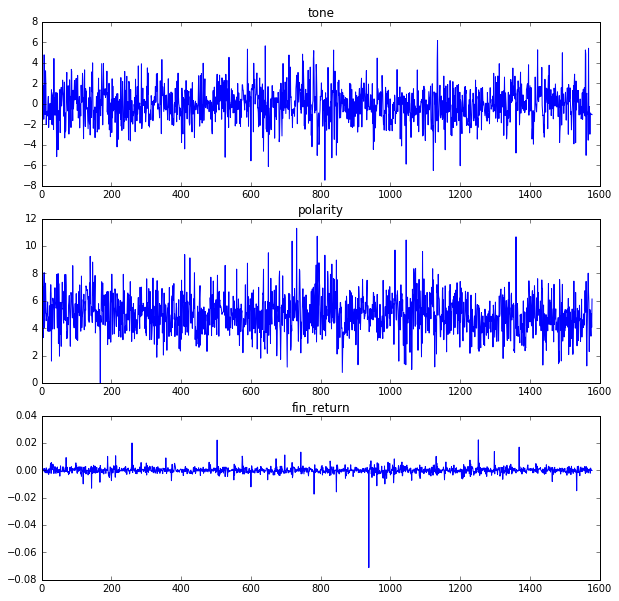

In [71]:
a = results.plot()

In [72]:
result = pd.read_csv("results.csv")

In [73]:
result = result[['date', 'aptone' ,'ap', 'ga', 'tone', 'fin_return']]

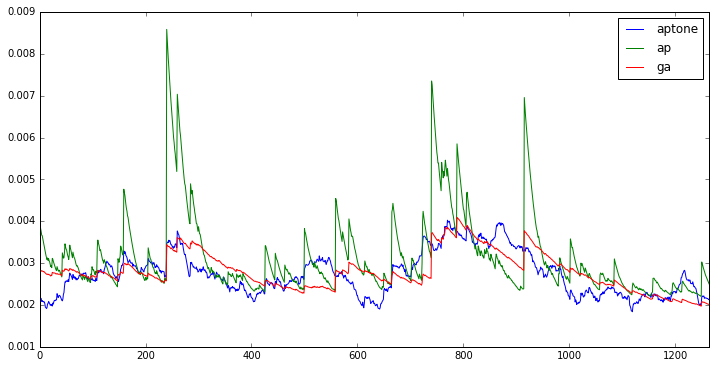

In [74]:
result[['aptone', 'ap', 'ga']].plot() 

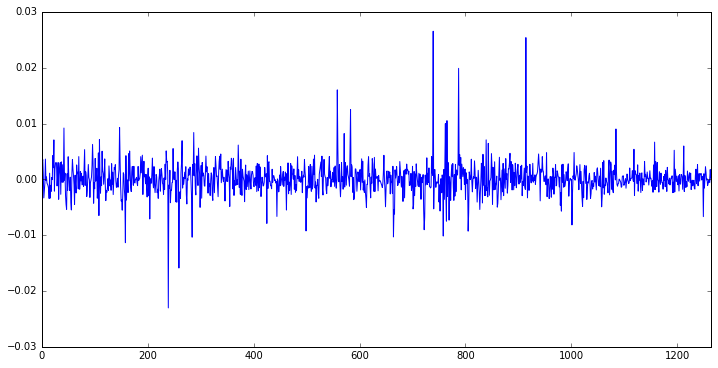

In [75]:
result['fin_return'].plot() 

In [76]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

In [77]:
result["Stock return"] = result.fin_return

In [78]:
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'

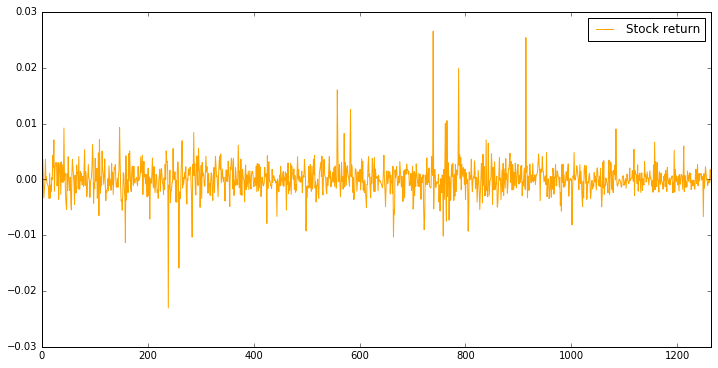

In [79]:
result['Stock return'].plot(color="orange", legend=1)

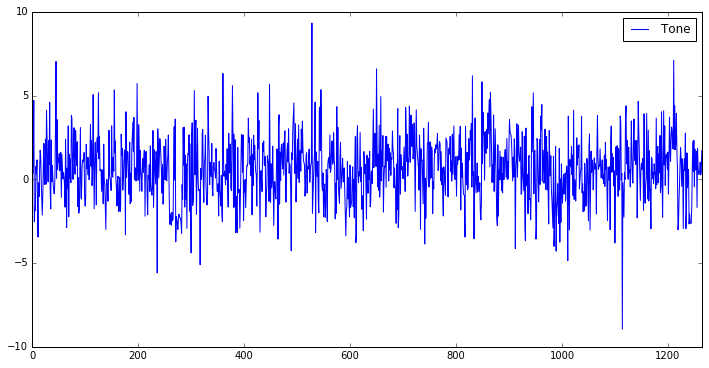

In [80]:
result["Tone"] = result.tone
result['Tone'].plot(legend=1)